In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('PCOS.csv')

In [3]:
data.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.3,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,#NAME?,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,#NAME?,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,#NAME?,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,#NAME?,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [4]:
data= data[['PCOS (Y/N)', ' Age (yrs)','Weight (Kg)','Blood Group','Hb(g/dl)','Marraige Status (Yrs)','Pregnant(Y/N)','RR (breaths/min)','RBS(mg/dl)','Weight gain(Y/N)','Skin darkening (Y/N)','Hair loss(Y/N)','Pimples(Y/N)','Endometrium (mm)']]

In [5]:
data

,PCOS (Y/N),Age (yrs),Weight (Kg),Blood Group,Hb(g/dl),Marraige Status (Yrs),Pregnant(Y/N),RR (breaths/min),RBS(mg/dl),Weight gain(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Endometrium (mm)
0,0,28,44.6,15,10.48,7.0,0,22,92.0,0,0,0,0,8.5
1,0,36,65.0,15,11.70,11.0,1,20,92.0,0,0,0,0,3.7
2,1,33,68.8,11,11.80,10.0,1,18,84.0,0,0,1,1,10.0
3,0,37,65.0,13,12.00,4.0,0,20,76.0,0,0,0,0,7.5
4,0,25,52.0,11,10.00,1.0,1,18,84.0,0,0,1,0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,0,35,50.0,17,11.00,8.0,0,16,92.0,0,0,0,0,6.7
537,0,30,63.2,15,10.80,4.0,1,18,108.0,1,0,0,0,8.2
538,0,36,54.0,13,10.80,8.0,0,20,92.0,0,0,0,0,7.3
539,0,27,50.0,15,12.00,2.0,0,20,115.0,0,0,0,1,11.5


In [6]:
data.isnull().sum()

PCOS (Y/N)               0
 Age (yrs)               0
Weight (Kg)              0
Blood Group              0
Hb(g/dl)                 0
Marraige Status (Yrs)    1
Pregnant(Y/N)            0
RR (breaths/min)         0
RBS(mg/dl)               0
Weight gain(Y/N)         0
Skin darkening (Y/N)     0
Hair loss(Y/N)           0
Pimples(Y/N)             0
Endometrium (mm)         0
dtype: int64

In [7]:
data['Marraige Status (Yrs)']=data['Marraige Status (Yrs)'].fillna(data['Marraige Status (Yrs)'].mean())

In [8]:
data.isnull().sum()

PCOS (Y/N)               0
 Age (yrs)               0
Weight (Kg)              0
Blood Group              0
Hb(g/dl)                 0
Marraige Status (Yrs)    0
Pregnant(Y/N)            0
RR (breaths/min)         0
RBS(mg/dl)               0
Weight gain(Y/N)         0
Skin darkening (Y/N)     0
Hair loss(Y/N)           0
Pimples(Y/N)             0
Endometrium (mm)         0
dtype: int64

In [9]:
data.shape

(541, 14)

In [10]:
data.describe()

,PCOS (Y/N),Age (yrs),Weight (Kg),Blood Group,Hb(g/dl),Marraige Status (Yrs),Pregnant(Y/N),RR (breaths/min),RBS(mg/dl),Weight gain(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,0.327172,31.430684,59.637153,13.802218,11.160037,7.680926,0.380776,19.243993,99.835860,0.377079,0.306839,0.452865,0.489834,8.475915
std,0.469615,5.411006,11.028287,1.840812,0.866904,4.799385,0.486027,1.688629,18.559298,0.485104,0.461609,0.498234,0.500359,2.165381
min,0.000000,20.000000,31.000000,11.000000,8.500000,0.000000,0.000000,16.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,28.000000,52.000000,13.000000,10.500000,4.000000,0.000000,18.000000,92.000000,0.000000,0.000000,0.000000,0.000000,7.000000
50%,0.000000,31.000000,59.000000,14.000000,11.000000,7.000000,0.000000,18.000000,100.000000,0.000000,0.000000,0.000000,0.000000,8.500000
75%,1.000000,35.000000,65.000000,15.000000,11.700000,10.000000,1.000000,20.000000,107.000000,1.000000,1.000000,1.000000,1.000000,9.800000
max,1.000000,48.000000,108.000000,18.000000,14.800000,30.000000,1.000000,28.000000,350.000000,1.000000,1.000000,1.000000,1.000000,18.000000


In [11]:
data.nunique()

PCOS (Y/N)                 2
 Age (yrs)                29
Weight (Kg)              117
Blood Group                8
Hb(g/dl)                  46
Marraige Status (Yrs)     35
Pregnant(Y/N)              2
RR (breaths/min)           8
RBS(mg/dl)                55
Weight gain(Y/N)           2
Skin darkening (Y/N)       2
Hair loss(Y/N)             2
Pimples(Y/N)               2
Endometrium (mm)          91
dtype: int64

In [12]:
data.columns

Index(['PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)', 'Blood Group', 'Hb(g/dl)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'RR (breaths/min)',
       'RBS(mg/dl)', 'Weight gain(Y/N)', 'Skin darkening (Y/N)',
       'Hair loss(Y/N)', 'Pimples(Y/N)', 'Endometrium (mm)'],
      dtype='object')

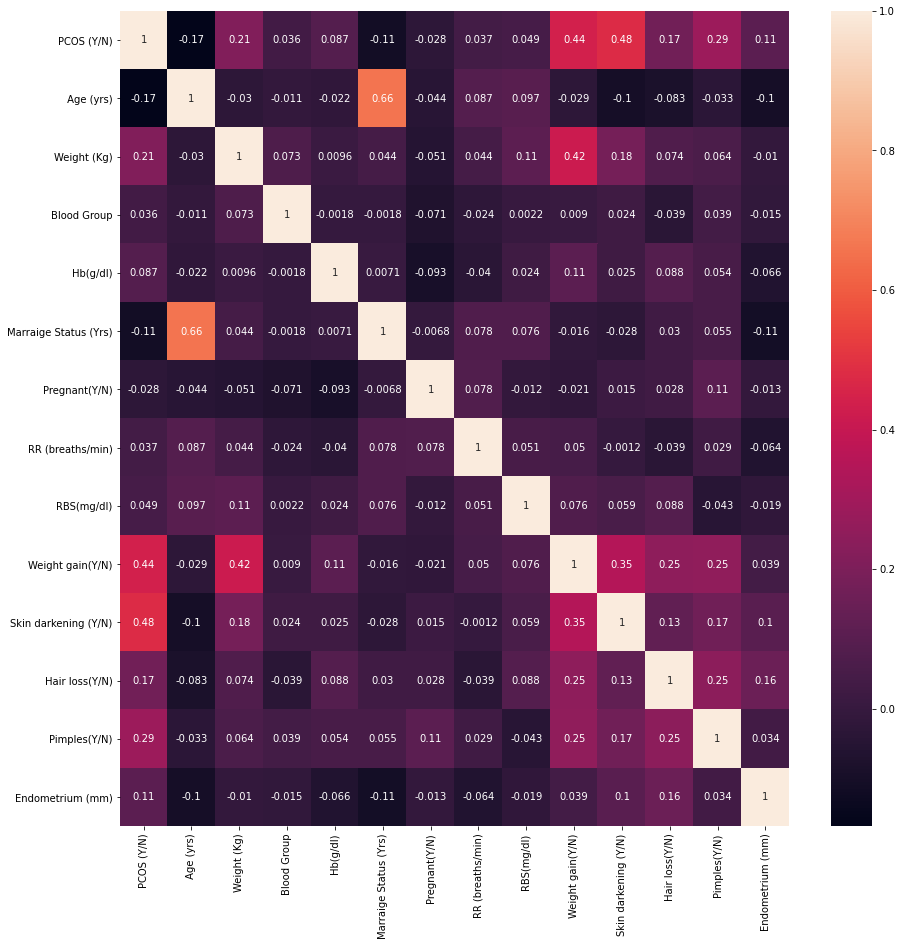

In [13]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True)
plt.show()

<AxesSubplot:xlabel='PCOS (Y/N)', ylabel='Endometrium (mm)'>

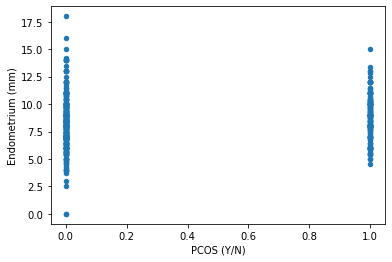

In [14]:
data.plot(kind="scatter", x="PCOS (Y/N)", y="Endometrium (mm)")

<AxesSubplot:>

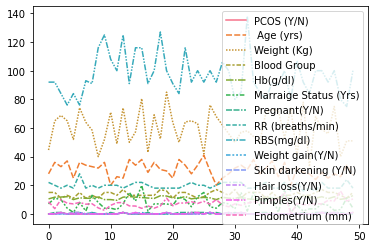

In [15]:
sns.lineplot(data=data.head(50))

Text(0, 0.5, 'PCOS (Y/N)')

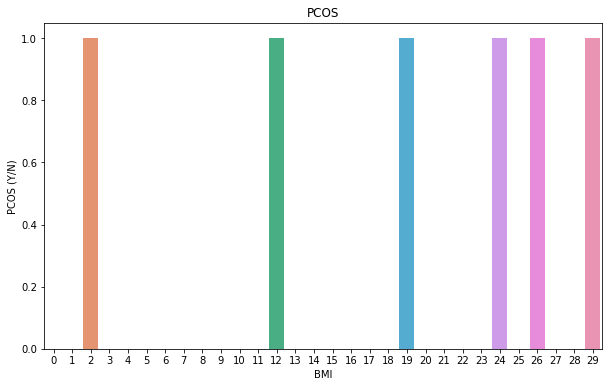

In [16]:
plt.figure(figsize=(10,6))
plt.title("PCOS")
sns.barplot(x=data.head(30).index, y=data.head(30)['PCOS (Y/N)'])
plt.xlabel("BMI")
plt.ylabel("PCOS (Y/N)")

In [17]:
X = data.drop(['PCOS (Y/N)'], axis=1)
Y = data['PCOS (Y/N)']

In [18]:
X

,Age (yrs),Weight (Kg),Blood Group,Hb(g/dl),Marraige Status (Yrs),Pregnant(Y/N),RR (breaths/min),RBS(mg/dl),Weight gain(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Endometrium (mm)
0,28,44.6,15,10.48,7.0,0,22,92.0,0,0,0,0,8.5
1,36,65.0,15,11.70,11.0,1,20,92.0,0,0,0,0,3.7
2,33,68.8,11,11.80,10.0,1,18,84.0,0,0,1,1,10.0
3,37,65.0,13,12.00,4.0,0,20,76.0,0,0,0,0,7.5
4,25,52.0,11,10.00,1.0,1,18,84.0,0,0,1,0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,35,50.0,17,11.00,8.0,0,16,92.0,0,0,0,0,6.7
537,30,63.2,15,10.80,4.0,1,18,108.0,1,0,0,0,8.2
538,36,54.0,13,10.80,8.0,0,20,92.0,0,0,0,0,7.3
539,27,50.0,15,12.00,2.0,0,20,115.0,0,0,0,1,11.5


In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=70)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(432, 13) (109, 13) (432,) (109,)


In [20]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)

LinearRegression()

In [21]:
print(lr_model.score(X_train, Y_train))

0.34819129351395073


In [22]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, Y_train)

DecisionTreeRegressor()

In [23]:
print(regressor.score(X_train, Y_train))

1.0


In [24]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=100,
                                  random_state=0)
reg.fit(X_train, Y_train) 

RandomForestRegressor(random_state=0)

In [25]:
print(reg.score(X_train, Y_train))

0.8891869540070914


In [26]:
Result= regressor.predict(np.array([[28,44.6,15,10.48,7.0,0,22,92.0,0,0,0,0,8.5]]))

In [27]:
if Result[0]==0:
   print('Output : ', 'PCOS DISEASE')
else:
   print('Output : ', 'HEALTHY')

Output :  PCOS DISEASE


In [28]:
Result1= regressor.predict(np.array([[33,68.8,11,11.80,10.0,1,18,84.0,0,0,1,1,10.0]]))

In [29]:
if Result1[0]==0:
   print('Output : ', 'PCOS DISEASE')
else:
   print('Output : ', 'HEALTHY')

Output :  HEALTHY


In [30]:
Result2= regressor.predict(np.array([[25,68.8,11,11.80,10.0,1,18,84.0,1,1,1,1,10.0]]))

In [31]:
if Result2[0]==0:
   print('Output : ', 'PCOS DISEASE')
else:
   print('Output : ', 'HEALTHY')

Output :  HEALTHY


In [32]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_filename = 'DT.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_filename, 'wb')
pickle.dump(regressor, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()